In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
import pandas as pd
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
df['Target']=iris.target

In [49]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
df[df.Target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [52]:
df[df.Target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
df[df.Target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [54]:
df['Flower_Name']=df.Target.apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [55]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline



In [57]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target', 'Flower_Name'],
      dtype='object')

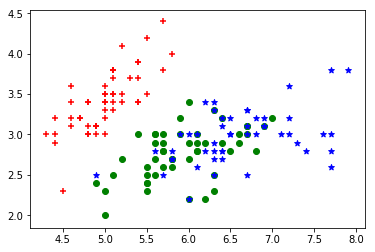

In [58]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],marker='+', color='red')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],marker='o', color='green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],marker='*', color='blue')

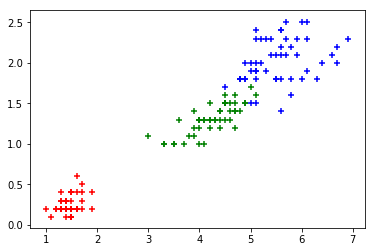

In [59]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],marker='+', color='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],marker='+', color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],marker='+', color='blue')

In [60]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa


In [63]:
df=df.drop(['Flower_Name'], axis='columns')

In [64]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0


In [65]:
x=df.drop(['Target'], axis='columns')
y=df.Target

In [66]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [69]:
len(X_train), len(X_test)

(120, 30)

In [71]:
from sklearn.svm import SVC

In [73]:
model=SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
model.score(X_test,y_test)

1.0

In [77]:
y_pred=model.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]], dtype=int64)

### Tune parameter

In [84]:
model_Kernal=SVC(kernel='linear')
model_Kernal.fit(X_train,y_train)
model_Kernal.score(X_test,y_test)

1.0

In [96]:
model_Kernal=SVC(kernel='poly')
model_Kernal.fit(X_train,y_train)
model_Kernal.score(X_test,y_test)

1.0

In [89]:
model_g=SVC(gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.9666666666666667

### Regulation tunning

In [94]:
model_c=SVC(C=1000)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.9666666666666667

In [97]:
y_predict1=model_c.predict(X_test)
cm1=confusion_matrix(y_predict1,y_test)
cm1

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]], dtype=int64)

In [95]:
model_c=SVC(C=1)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

1.0